In [2]:
from modules.general.F_search import *
from modules.graph.hist1D import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import h5py
import math

In [3]:
INPUT = '/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon_all/DarkSUSY_all_NMuon_USER.h5'
INPUT2 = '/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon/DarkSUSY_USER.h5'
hf = h5py.File(INPUT, 'r')

def find_Mu_Entries(vector, variable="Mu_Entries", file=hf):
    name_local_group = "MNeuL_" + str(vector[0]) + "/MNeuD_" + str(vector[1]) + \
                       "/MPhoD_" + str(vector[2]) + "/TcPhoD_" + str(vector[3]) + \
                       "/" + vector[4]
    # print(name_local_group)
    try:
        # print(name_local_group + "/" + variable)
        output = np.array(file.get(name_local_group + "/" + variable))
    except:
        output = None
    # print(output)
    return output

def frec(data, number, porciento=.1, repetir=100):
    output = np.zeros(repetir)
    Nl = len(data)
    for i in range(repetir):
        if porciento <1:
            corte2, corte = train_test_split(data, test_size =porciento, shuffle = True)
        else:
            corte = data
        # print(len(corte), len(corte2))
        output[i] = float(np.sum(corte==number))/len(corte)
    #print(len(corte))
        # print(output[i], corte==number)
    return output

def frec2(data, number, porciento=1, repetir=1):
    output = np.zeros(repetir)
    Nl = len(data)
    for i in range(repetir):
        if porciento <1:
            corte2, corte = train_test_split(data, test_size =porciento, shuffle = True)
        else:
            corte = data
        # print(len(corte), len(corte2))
        output[i] = float(np.sum(corte==number))/10000
    #print(len(corte))
        # print(output[i], corte==number)
    return output

# graficar histograma especifico para este caso
def graficar_HISTG_ENTRIES(ax, vector, color="red"):
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")

    ax.hist(frec(Mu_Entries, 0, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="0 Sin muones")
    ax.hist(frec(Mu_Entries, 1, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="1 muones")
    ax.hist(frec(Mu_Entries, 2, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="2 muones")
    ax.hist(frec(Mu_Entries, 3, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="3 muones")
    ax.hist(frec(Mu_Entries, 4, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="4 muones")
    ax.axvline(x=frec(Mu_Entries, 0, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 1, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 2, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 3, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 4, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
    # ax.set_xlabel(" Porcentaje de Eventos")
    ax.set_ylabel(" Frecuencia Normalizada $f_N$")
    # ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
    #              "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
    #              ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
    ax.grid(True)
    return ax

def binomialX(NN, nn, p, ff=0):
    # p = p*10/11 # *(NN-nn)
    # print(math.factorial(NN), (math.factorial(nn) * math.factorial(NN-nn)), (1-p)**(NN-nn))
    ProbX = math.factorial(NN)/(math.factorial(nn) * math.factorial(NN-nn)) * \
            (p+ff*(NN-nn))**nn * (1-p-ff*(NN-nn))**(NN-nn)
    return ProbX

def ProbX4(prob4, nn, ff=0):
    p = prob4**(1.0/4)
    probX = np.zeros(len(nn))
    for inn in range(len(nn)):
        #print(str(p), inn, probX, probX[inn])
        probX[inn] = binomialX(4, int(nn[inn]), p, ff)
    return probX

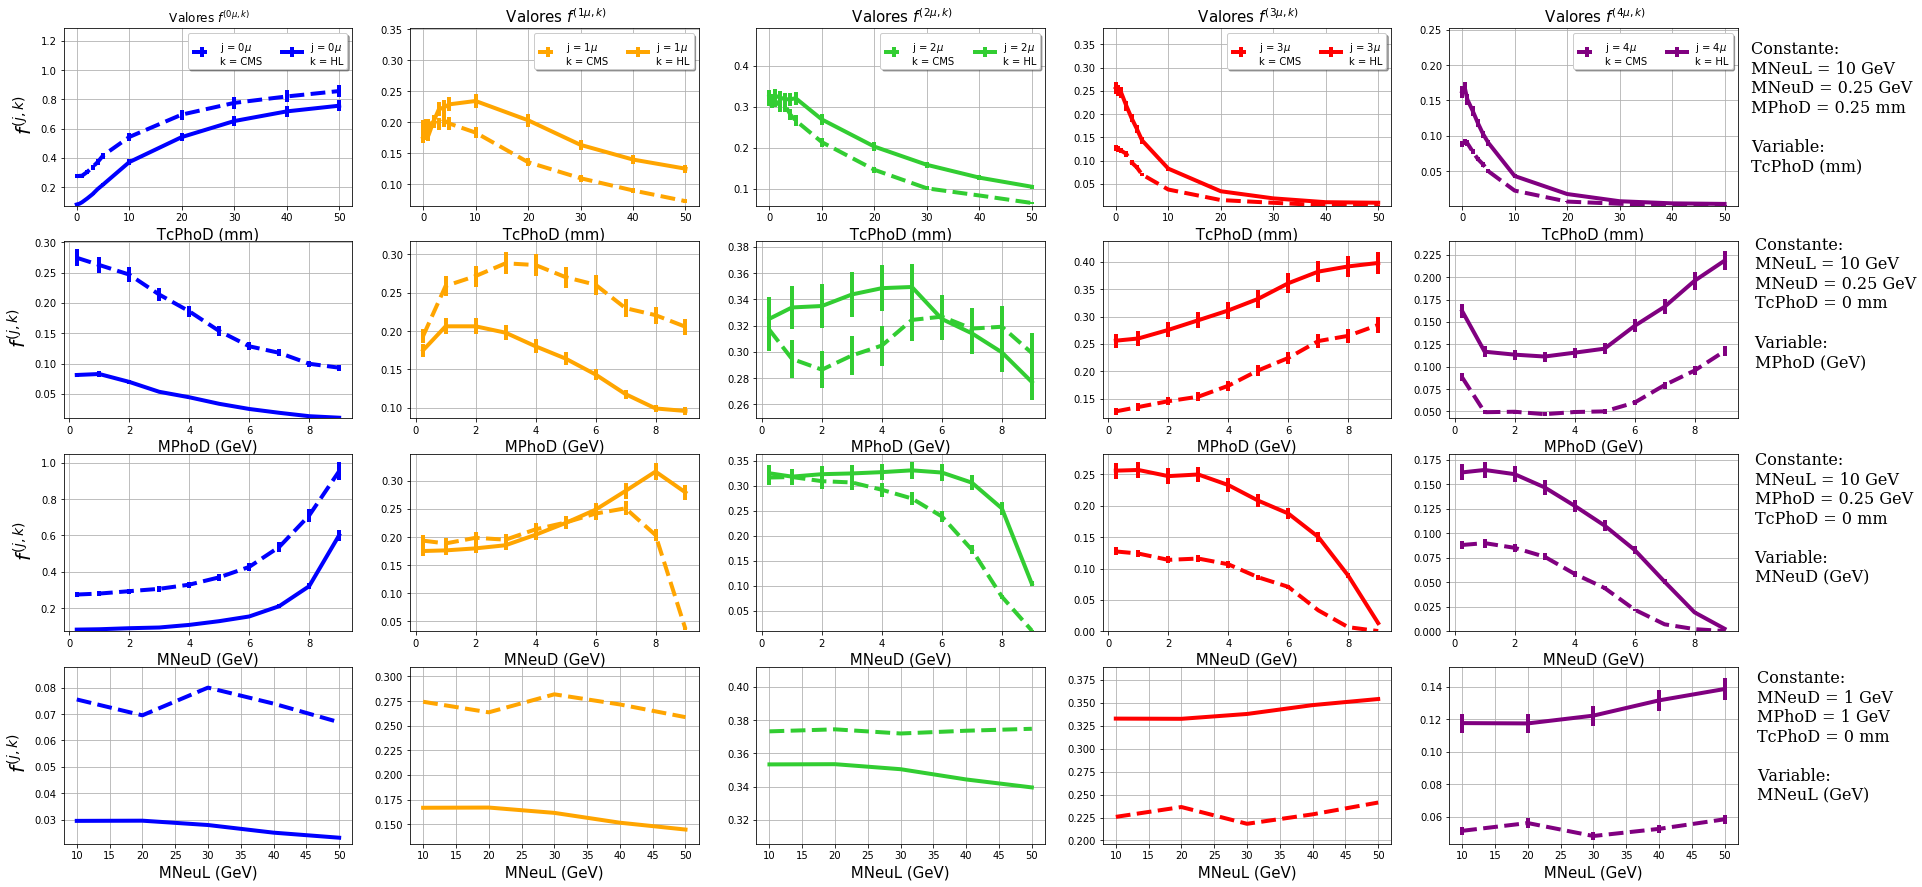

In [11]:
color0="blue"
color1="orange"
color2="limegreen"
color3="red"
color4="purple"

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

mmHL=4
mmCMS=4
mmlabel=15
plt.rcParams['figure.figsize'] = [30, 15]
fig = plt.figure()
INPUT = '/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon_all/DarkSUSY_all_NMuon_USER.h5'
hf = h5py.File(INPUT, 'r')

X_TcPhoD = [0, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
Y_Entries_CMS_TcPhoD = np.zeros((len(X_TcPhoD), 5))
Y_Entries_HL_TcPhoD = np.zeros((len(X_TcPhoD), 5))
for iTcPhoD in range(len(X_TcPhoD)):
    vector = [10, 0.25, 0.25, X_TcPhoD[iTcPhoD], "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_CMS_TcPhoD[iTcPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                        frec(Mu_Entries, 1, 1, repetir=1)[0],
                                        frec(Mu_Entries, 2, 1, repetir=1)[0],
                                        frec(Mu_Entries, 3, 1, repetir=1)[0],
                                        frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, 0.25, 0.25, X_TcPhoD[iTcPhoD], "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_HL_TcPhoD[iTcPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                        frec(Mu_Entries, 1, 1, repetir=1)[0],
                                        frec(Mu_Entries, 2, 1, repetir=1)[0],
                                        frec(Mu_Entries, 3, 1, repetir=1)[0],
                                        frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(4, 5, 1)
ax.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,0], color=color0, label="j = $0\mu$"+"\n"+"k = CMS",
            yerr=Y_Entries_CMS_TcPhoD[:,0]/20, xerr=0, fmt="--", linewidth=mmCMS)
ax.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,0], color=color0, label="j = $0\mu$"+"\n"+"k = HL",
            yerr=Y_Entries_HL_TcPhoD[:,0]/20, xerr=0, fmt="", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_ylabel(" $f^{(j,k)}$ ", size=mmlabel+5)
ax.set_xlabel(" TcPhoD (mm) ", size=mmlabel)
ax.set_title(" Valores $f^{(0\mu,k)}$ ")
min = np.min([Y_Entries_CMS_TcPhoD[:,0],Y_Entries_HL_TcPhoD[:,0]])
max = np.max([Y_Entries_CMS_TcPhoD[:,0],Y_Entries_HL_TcPhoD[:,0]])
ax.set_ylim(min*9/10, max*15/10)

ax = fig.add_subplot(4, 5, 2)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,1], color=color1, label="j = $1\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,1]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,1], color=color1, label="j = $1\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_TcPhoD[:,1]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ", size=mmlabel)
ax.set_title(" Valores $f^{(1\mu,k)}$ ", size=mmlabel)
min = np.min([Y_Entries_CMS_TcPhoD[:,1],Y_Entries_HL_TcPhoD[:,1]])
max = np.max([Y_Entries_CMS_TcPhoD[:,1],Y_Entries_HL_TcPhoD[:,1]])
ax.set_ylim(min*9/10, max*15/10)

ax = fig.add_subplot(4, 5, 3)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,2], color=color2, label="j = $2\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,2]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,2], color=color2, label="j = $2\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_TcPhoD[:,2]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ", size=mmlabel)
ax.set_title(" Valores $f^{(2\mu,k)}$ ", size=mmlabel)
min = np.min([Y_Entries_CMS_TcPhoD[:,2],Y_Entries_HL_TcPhoD[:,2]])
max = np.max([Y_Entries_CMS_TcPhoD[:,2],Y_Entries_HL_TcPhoD[:,2]])
ax.set_ylim(min*9/10, max*15/10)

ax = fig.add_subplot(4, 5, 4)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,3],  color=color3, label="j = $3\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,3]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,3],  color=color3, label="j = $3\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_TcPhoD[:,3]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ", size=mmlabel)
ax.set_title(" Valores $f^{(3\mu,k)}$ ", size=mmlabel)
min = np.min([Y_Entries_CMS_TcPhoD[:,3],Y_Entries_HL_TcPhoD[:,3]])
max = np.max([Y_Entries_CMS_TcPhoD[:,3],Y_Entries_HL_TcPhoD[:,3]])
ax.set_ylim(min*9/10, max*15/10)

ax = fig.add_subplot(4, 5, 5)
plt.errorbar(X_TcPhoD, Y_Entries_CMS_TcPhoD[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_TcPhoD[:,4]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_TcPhoD, Y_Entries_HL_TcPhoD[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_TcPhoD[:,4]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" TcPhoD (mm) ", size=mmlabel)
ax.set_title(" Valores $f^{(4\mu,k)}$ ", size=mmlabel)
min = np.min([Y_Entries_CMS_TcPhoD[:,4],Y_Entries_HL_TcPhoD[:,4]])
max = np.max([Y_Entries_CMS_TcPhoD[:,4],Y_Entries_HL_TcPhoD[:,4]])
ax.set_ylim(min*9/10, max*15/10)
text="Constante: " + "\n" +\
     "MNeuL = " + str(vector[0]) + " GeV" + "\n" + \
     "MNeuD = " + str(vector[1]) + " GeV" + "\n"+\
     "MPhoD = " + str(vector[2]) + " mm" + "\n" + "\n" +\
     "Variable:" + "\n" + \
     "TcPhoD (mm)"
ax.text(55, 0.05, text, fontdict=font)

## DATOS PARA LA SEGUNDA FILA ##
X_MPhoD = [0.25, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y_Entries_CMS_MPhoD = np.zeros((len(X_MPhoD), 5))
Y_Entries_HL_MPhoD = np.zeros((len(X_MPhoD), 5))
for iMPhoD in range(len(X_MPhoD)):
    vector = [10, 0.25, X_MPhoD[iMPhoD], 0, "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_CMS_MPhoD[iMPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, 0.25, X_MPhoD[iMPhoD], 0, "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_HL_MPhoD[iMPhoD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(4, 5, 6)
ax.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,0], color=color0, label="j = $0\mu$"+"\n"+"k = CMS",
            yerr=Y_Entries_CMS_MPhoD[:,0]/20, xerr=0, fmt="--", linewidth=mmCMS)
ax.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,0], color=color0, label="j = $0\mu$"+"\n"+"k = HL",
            yerr=Y_Entries_HL_MPhoD[:,0]/20, xerr=0, fmt="", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_ylabel(" $f^{(j,k)}$ ", size=mmlabel+5)
ax.set_xlabel(" MPhoD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MPhoD[:,0],Y_Entries_HL_MPhoD[:,0]])
max = np.max([Y_Entries_CMS_MPhoD[:,0],Y_Entries_HL_MPhoD[:,0]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 7)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,1], color=color1, label="j = $1\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MPhoD[:,1]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,1], color=color1, label="j = $1\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MPhoD[:,1]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MPhoD[:,1],Y_Entries_HL_MPhoD[:,1]])
max = np.max([Y_Entries_CMS_MPhoD[:,1],Y_Entries_HL_MPhoD[:,1]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 8)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,2], color=color2, label="j = $2\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MPhoD[:,2]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,2], color=color2, label="j = $2\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MPhoD[:,2]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MPhoD[:,2],Y_Entries_HL_MPhoD[:,2]])
max = np.max([Y_Entries_CMS_MPhoD[:,2],Y_Entries_HL_MPhoD[:,2]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 9)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,3],  color=color3, label="j = $3\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MPhoD[:,3]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,3],  color=color3, label="j = $3\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MPhoD[:,3]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MPhoD[:,3],Y_Entries_HL_MPhoD[:,3]])
max = np.max([Y_Entries_CMS_MPhoD[:,3],Y_Entries_HL_MPhoD[:,3]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 10)
plt.errorbar(X_MPhoD, Y_Entries_CMS_MPhoD[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MPhoD[:,4]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MPhoD, Y_Entries_HL_MPhoD[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MPhoD[:,4]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MPhoD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MPhoD[:,4],Y_Entries_HL_MPhoD[:,4]])
max = np.max([Y_Entries_CMS_MPhoD[:,4],Y_Entries_HL_MPhoD[:,4]])
ax.set_ylim(min*9/10, max*11/10)
text="Constante: " + "\n" +\
     "MNeuL = " + str(vector[0]) + " GeV" + "\n" + \
     "MNeuD = " + str(vector[1]) + " GeV" + "\n"+\
     "TcPhoD = " + str(vector[3]) + " mm" + "\n" + "\n" +\
     "Variable:" + "\n" + \
     "MPhoD (GeV)"
ax.text(10, 0.1, text, fontdict=font)

## DATOS PARA LA TERCERO FILA ##
X_MNeuD = [0.25, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y_Entries_CMS_MNeuD = np.zeros((len(X_MNeuD), 5))
Y_Entries_HL_MNeuD = np.zeros((len(X_MNeuD), 5))
for iMNeuD in range(len(X_MNeuD)):
    vector = [10, X_MNeuD[iMNeuD],  0.25, 0, "_CMS_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_CMS_MNeuD[iMNeuD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

    vector = [10, X_MNeuD[iMNeuD],  0.25, 0, "_HL_"]
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_HL_MNeuD[iMNeuD, :] = [frec(Mu_Entries, 0, 1, repetir=1)[0],
                                      frec(Mu_Entries, 1, 1, repetir=1)[0],
                                      frec(Mu_Entries, 2, 1, repetir=1)[0],
                                      frec(Mu_Entries, 3, 1, repetir=1)[0],
                                      frec(Mu_Entries, 4, 1, repetir=1)[0]]

ax = fig.add_subplot(4, 5, 11)
ax.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,0], color=color0, label="j = $0\mu$"+"\n"+"k = CMS",
            yerr=Y_Entries_CMS_MNeuD[:,0]/20, xerr=0, fmt="--", linewidth=mmCMS)
ax.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,0], color=color0, label="j = $0\mu$"+"\n"+"k = HL",
            yerr=Y_Entries_HL_MNeuD[:,0]/20, xerr=0, fmt="", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_ylabel(" $f^{(j,k)}$ ", size=mmlabel+5)
ax.set_xlabel(" MNeuD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuD[:,0],Y_Entries_HL_MNeuD[:,0]])
max = np.max([Y_Entries_CMS_MNeuD[:,0],Y_Entries_HL_MNeuD[:,0]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 12)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,1], color=color1, label="j = $1\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MNeuD[:,1]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,1], color=color1, label="j = $1\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MNeuD[:,1]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuD[:,1],Y_Entries_HL_MNeuD[:,1]])
max = np.max([Y_Entries_CMS_MNeuD[:,1],Y_Entries_HL_MNeuD[:,1]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 13)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,2], color=color2, label="j = $2\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MNeuD[:,2]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,2], color=color2, label="j = $2\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MNeuD[:,2]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuD[:,2],Y_Entries_HL_MNeuD[:,2]])
max = np.max([Y_Entries_CMS_MNeuD[:,2],Y_Entries_HL_MNeuD[:,2]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 14)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,3],  color=color3, label="j = $3\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MNeuD[:,3]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,3],  color=color3, label="j = $3\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MNeuD[:,3]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuD[:,3],Y_Entries_HL_MNeuD[:,3]])
max = np.max([Y_Entries_CMS_MNeuD[:,3],Y_Entries_HL_MNeuD[:,3]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 15)
plt.errorbar(X_MNeuD, Y_Entries_CMS_MNeuD[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MNeuD[:,4]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuD, Y_Entries_HL_MNeuD[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MNeuD[:,4]/20, xerr=0, fmt="-", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuD (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuD[:,4],Y_Entries_HL_MNeuD[:,4]])
max = np.max([Y_Entries_CMS_MNeuD[:,4],Y_Entries_HL_MNeuD[:,4]])
ax.set_ylim(min*9/10, max*11/10)

text="Constante: " + "\n" +\
     "MNeuL = " + str(vector[0]) + " GeV" + "\n" + \
     "MPhoD = " + str(vector[2]) + " GeV" + "\n"+\
     "TcPhoD = " + str(vector[3]) + " mm" + "\n" + "\n" +\
     "Variable:" + "\n" + \
     "MNeuD (GeV)"

ax.text(10, 0.05, text, fontdict=font)


## DATOS PARA LA CUARTA FILA ##
INPUT2 = '/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon/DarkSUSY_USER.h5'
hf = h5py.File(INPUT2, 'r')
X_MNeuL = [10, 20, 30, 40, 50]
Y_Entries_CMS_MNeuL = np.zeros((len(X_MNeuL), 5))
Y_Entries_HL_MNeuL = np.zeros((len(X_MNeuL), 5))
for iMNeuL in range(len(X_MNeuL)):
    vector = [X_MNeuL[iMNeuL], 1, 1, 0, "_CMS_"]
    # print(str(vector))
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_CMS_MNeuL[iMNeuL, :] = ProbX4(frec2(Mu_Entries, 4, 1, repetir=1)[0], [0, 1, 2, 3, 4])
    vector = [X_MNeuL[iMNeuL], 1, 1, 0, "_HL_"]
    # print(str(vector), Y_Entries_CMS_MNeuL[iMNeuL, :])
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries", file=hf)
    Y_Entries_HL_MNeuL[iMNeuL, :] = ProbX4(frec2(Mu_Entries, 4, 1, repetir=1)[0], [0, 1, 2, 3, 4])

ax = fig.add_subplot(4, 5, 16)
ax.plot(X_MNeuL, Y_Entries_CMS_MNeuL[:,0], '--', color=color0, label="j = $0\mu$"+"\n"+"k = CMS", linewidth=mmCMS)
ax.plot(X_MNeuL, Y_Entries_HL_MNeuL[:,0], '-', color=color0, label="j = $0\mu$"+"\n"+"k = HL", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_ylabel(" $f^{(j,k)}$ ", size=mmlabel+5)
ax.set_xlabel(" MNeuL (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuL[:,0],Y_Entries_HL_MNeuL[:,0]])
max = np.max([Y_Entries_CMS_MNeuL[:,0],Y_Entries_HL_MNeuL[:,0]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 17)
plt.plot(X_MNeuL, Y_Entries_CMS_MNeuL[:,1],  '--', color=color1, label="j = $1\mu$"+"\n"+"k = CMS", linewidth=mmCMS)
plt.plot(X_MNeuL, Y_Entries_HL_MNeuL[:,1], '-', color=color1, label="j = $1\mu$"+"\n"+"k = HL", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuL (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuL[:,1],Y_Entries_HL_MNeuL[:,1]])
max = np.max([Y_Entries_CMS_MNeuL[:,1],Y_Entries_HL_MNeuL[:,1]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 18)
plt.plot(X_MNeuL, Y_Entries_CMS_MNeuL[:,2],  '--', color=color2, label="j = $2\mu$"+"\n"+"k = CMS", linewidth=mmCMS)
plt.plot(X_MNeuL, Y_Entries_HL_MNeuL[:,2], '-', color=color2, label="j = $2\mu$"+"\n"+"k = HL", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuL (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuL[:,2],Y_Entries_HL_MNeuL[:,2]])
max = np.max([Y_Entries_CMS_MNeuL[:,2],Y_Entries_HL_MNeuL[:,2]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 19)
plt.plot(X_MNeuL, Y_Entries_CMS_MNeuL[:,3],  '--', color=color3, label="j = $3\mu$"+"\n"+"k = CMS", linewidth=mmCMS)
plt.plot(X_MNeuL, Y_Entries_HL_MNeuL[:,3], '-', color=color3, label="j = $3\mu$"+"\n"+"k = HL", linewidth=mmHL)
ax.grid(True)
# ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuL (GeV) ", size=mmlabel)
min = np.min([Y_Entries_CMS_MNeuL[:,3],Y_Entries_HL_MNeuL[:,3]])
max = np.max([Y_Entries_CMS_MNeuL[:,3],Y_Entries_HL_MNeuL[:,3]])
ax.set_ylim(min*9/10, max*11/10)

ax = fig.add_subplot(4, 5, 20)
plt.errorbar(X_MNeuL, Y_Entries_CMS_MNeuL[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = CMS",
             yerr=Y_Entries_CMS_MNeuL[:,4]/20, xerr=0, fmt="--", linewidth=mmCMS)
plt.errorbar(X_MNeuL, Y_Entries_HL_MNeuL[:,4], color=color4, label="j = $4\mu$"+"\n"+"k = HL",
             yerr=Y_Entries_HL_MNeuL[:,4]/20, xerr=0, fmt="-", linewidth=mmHL)
# plt.plot(X_MNeuL, Y_Entries_CMS_MNeuL[:,4],  '--', color=color4, label="j = $4\mu$"+"\n"+"k = CMS", linewidth=mmCMS)
# plt.plot(X_MNeuL, Y_Entries_HL_MNeuL[:,4], '-', color=color4, label="j = $4\mu$"+"\n"+"k = HL", linewidth=mmHL)
ax.grid(True)
#ax.legend(loc='upper right', shadow=True, ncol=4)
ax.set_xlabel(" MNeuL (GeV) ", size=mmlabel)
# ax.set_title()
min = np.min([Y_Entries_CMS_MNeuL[:,4],Y_Entries_HL_MNeuL[:,4]])
max = np.max([Y_Entries_CMS_MNeuL[:,4],Y_Entries_HL_MNeuL[:,4]])
ax.set_ylim(min*9/10, max*11/10)

text="Constante: " + "\n" +\
     "MNeuD = " + str(vector[1]) + " GeV" + "\n" + \
     "MPhoD = " + str(vector[2]) + " GeV" + "\n"+\
     "TcPhoD = " + str(vector[3]) + " mm" + "\n" + "\n" +\
     "Variable:" + "\n" + \
     "MNeuL (GeV)"

ax.text(55, 0.07, text, fontdict=font)
####

fig.savefig("Comparacion_Distribucion_Entries.pdf")
fig.savefig("Comparacion_Distribucion_Entries.png")
plt.show()


In [5]:
np.min([Y_Entries_CMS_MNeuL[:,4],Y_Entries_HL_MNeuL[:,4]])

0.047999999999999994